<a href="https://colab.research.google.com/github/Rumaisa10/bangla_Sentiment_analysis/blob/main/Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from tensorflow.keras.preprocessing.text import Tokenizer
path ='/content/ds_drama.csv' 
stopwords_list = path+'bangla_stopwords.txt'
class color: # Text style
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
data = pd.read_csv('ds_drama1.csv',encoding='UTF-8')
print("Total Reviews:",len(data),
"\nTotal Positive Reviews:",len(data[data.polarity ==1]),
"\nTotal Neutral Reviews:",len(data[data.polarity==2]),
 "\nTotal Negative Reviews:",len(data[data.polarity==0]))

Total Reviews: 2312 
Total Positive Reviews: 1123 
Total Neutral Reviews: 318 
Total Negative Reviews: 871


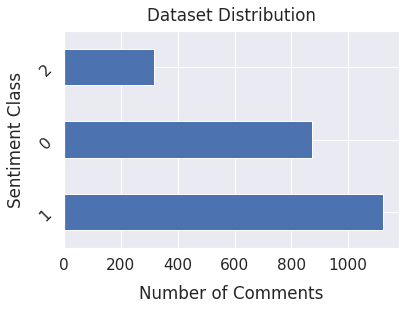

In [ ]:
sns.set(font_scale=1.4)
data['polarity'].value_counts().plot(kind='barh', figsize=(6, 4))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

In [ ]:
sample_data = [10,100,150,200,250,400,400,500,600,650,660,689,600,700,750,]
for i in sample_data:
      print(data.comment[i],'\n','Sentiment:-- ',data.polarity[i],'\n') 

ইদানীং দেখতে পারছি বাংলা নাটক সামিরা খান মাহির দখলে, যেমন শুনতে মজা লাগে তার সিলেটী ভাষা, তেমন তার ইংলিশ স্পিকিং 
 Sentiment:--  1 

মনে করছিলাম ঢুবাইয়ের সিন সিনারি থাকবে এজন্য দেখতে বসলাম, কিন্তু নাটক দেখে হতাশ 
 Sentiment:--  0 

নাটকে বাবার চরিত্রটা দেখবার মতো ছিল,,একদম মজার🥰😁 অনেক হাসলাম নাটকটা দেখে,,সত্যিই খুব অসাধারণ ছিল 
 Sentiment:--  1 

আশা করি সকলের কাছে নাটকটি ভালো লেগেছে,  
 Sentiment:--  1 

নাটক টা কি রকম হইছে জানিনা 
 Sentiment:--  2 

ভালো হয়নি, গল্প নাই শুধুই ভাঁড়ামি 
 Sentiment:--  0 

ভালো হয়নি, গল্প নাই শুধুই ভাঁড়ামি 
 Sentiment:--  0 

ফালতু চোদা গল্প 
 Sentiment:--  0 

 অনেক সুন্দর একটা নাটক। চোখের পানি ধোরে রাখা জায়না 
 Sentiment:--  1 

 শেষটা খুবই সুন্দর হয়েছে....এগিয়ে যান নিশো ভাই আর তিশা আপু 
 Sentiment:--  1 

 মিস করার মানুষটা যদি তার ভুলগুলো বুজতে পারতো।আফরান নিশো আসলে সেরা 
 Sentiment:--  1 

 খুব ভালো লাগলো 
 Sentiment:--  1 

 অনেক সুন্দর একটা নাটক। চোখের পানি ধোরে রাখা জায়না 
 Sentiment:--  1 

 ফালতু, একটা কথা মাথায় রাখা উচিত। জোর করে কমেডি বানা

In [ ]:
def process_comments(comment): 
    comment = re.sub('[^\u0980-\u09FF]',' ',str(comment)) 
    return comment

In [ ]:
data['cleaned'] = data['comment'].apply(process_comments)  


sample_data = [160,1060,150,222,250,403,455,501,609,685,686,608,600,701,750]
for i in sample_data:
     print('Original:\n',data.comment[i],'\nCleaned:\n',
           data.cleaned[i],'\n','Sentiment:-- ',data.polarity[i],'\n')

Original:
 শুরুটা হাসি দিয়ে 😃😃শেষটা কান্না দিয়ে 😭😭নাটকা সুন্দর হয়েছে 
Cleaned:
 শুরুটা হাসি দিয়ে   শেষটা কান্না দিয়ে   নাটকা সুন্দর হয়েছে 
 Sentiment:--  1 

Original:
  নামাজ পড়ার আদেশ অনেক ভালো লাগলো। পরিচালককে অনেক ধন্যবাদ এমন একটি গল্প লেখার জন্য। 
Cleaned:
  নামাজ পড়ার আদেশ অনেক ভালো লাগলো  পরিচালককে অনেক ধন্যবাদ এমন একটি গল্প লেখার জন্য  
 Sentiment:--  1 

Original:
 নাটকে বাবার চরিত্রটা দেখবার মতো ছিল,,একদম মজার🥰😁 অনেক হাসলাম নাটকটা দেখে,,সত্যিই খুব অসাধারণ ছিল 
Cleaned:
 নাটকে বাবার চরিত্রটা দেখবার মতো ছিল  একদম মজার   অনেক হাসলাম নাটকটা দেখে  সত্যিই খুব অসাধারণ ছিল 
 Sentiment:--  1 

Original:
 নাটক ভালো লাগলে কি হবে মিথিলা কে তো ভালো লাগে না,, 
Cleaned:
 নাটক ভালো লাগলে কি হবে মিথিলা কে তো ভালো লাগে না   
 Sentiment:--  2 

Original:
 নাটক টা কি রকম হইছে জানিনা 
Cleaned:
 নাটক টা কি রকম হইছে জানিনা 
 Sentiment:--  2 

Original:
 অসাধারন একটা নাটক,খুবই ভাল লাগছে,বিশ্বাস এমন একটা জিনিস যেটা রাখার য্যোগতা সবার থাকে না 
Cleaned:
 অসাধারন একটা নাটক খুবই ভাল লাগছে বিশ্বাস এমন একট

In [ ]:
# Length of each Reveiws
data['length'] = data['cleaned'].apply(lambda x:len(x.split()))
# Remove the reviews with least words
dataset = data.loc[data.length>0]
dataset = dataset.reset_index(drop = True)
print("After Cleaning:","\nRemoved {} Small Reviews".format(len(data)-len(dataset)),
      "\nTotal Reviews:",len(dataset))

After Cleaning: 
Removed 0 Small Reviews 
Total Reviews: 2312


In [ ]:
def data_summary(dataset):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(dataset.cleaned) for word in t.strip().split()]
    class_label= [k for k,v in dataset.polarity.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(dataset[dataset.polarity==label].cleaned) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(dataset[dataset.polarity==label].cleaned)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(dataset[dataset.polarity==label].cleaned))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(dataset)   


Class Name :  1
Number of Documents:1123
Number of Words:14005
Number of Unique Words:2877
Most Frequent Words:

নাটক	596
অনেক	328
ভালো	294
সুন্দর	233
অসাধারণ	212
ভাই	149
এই	146
একটা	144
খুব	143
জন্য	137

Class Name :  0
Number of Documents:871
Number of Words:9307
Number of Unique Words:2715
Most Frequent Words:

নাটক	477
না	204
ফালতু	164
এই	147
আর	119
নাটকের	95
একটা	94
কি	82
নাই	80
ভালো	72

Class Name :  2
Number of Documents:318
Number of Words:4399
Number of Unique Words:1704
Most Frequent Words:

নাটক	139
না	85
এই	73
নাটকের	51
আমার	37
করে	37
নাটকে	36
আর	35
দেখে	33
কে	32
Total Number of Unique Words:5305


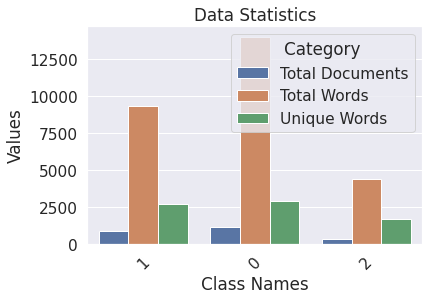

In [ ]:
data_matrix = pd.DataFrame({'Total Documents':documents,
                            'Total Words':words,
                            'Unique Words':u_words,
                            'Class Names':class_names})
df = pd.melt(data_matrix, id_vars="Class Names", var_name="Category", value_name="Values")
plt.figure(figsize=(6, 4))
ax = plt.subplot()

sns.barplot(data=df,x='Class Names', y='Values' ,hue='Category')
ax.set_xlabel('Class Names') 
ax.set_title('Data Statistics')

ax.xaxis.set_ticklabels(class_names, rotation=45);

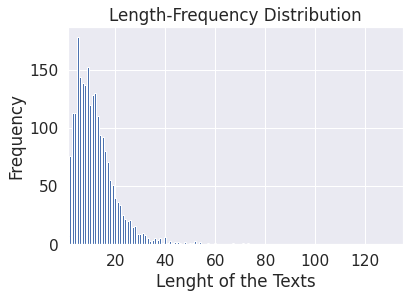

Maximum Length of a review: 73
Minimum Length of a review: 1
Average Length of a reviews: 12.0


In [ ]:

dataset['ReviewLength'] = dataset.cleaned.apply(lambda x:len(x.split()))
frequency = dict()
for i in dataset.ReviewLength:
    frequency[i] = frequency.get(i, 0)+1

plt.bar(frequency.keys(), frequency.values(), color ="b")
plt.xlim(1, 135)

plt.xlabel('Lenght of the Texts')
plt.ylabel('Frequency')
plt.title('Length-Frequency Distribution')
plt.show()  
print(f"Maximum Length of a review: {max(dataset.ReviewLength)}")
print(f"Minimum Length of a review: {min(dataset.ReviewLength)}")
print(f"Average Length of a reviews: {round(np.mean(dataset.ReviewLength),0)}")

Taking positive,negative and nuetral class for model building


In [ ]:
positive = dataset[dataset.polarity == 1]
negative = dataset[dataset.polarity == 0]
neutral = dataset[dataset.polarity == 2]
dataset= positive
dataset = positive.append(negative,ignore_index=True)
dataset = dataset.append(neutral,ignore_index=True)
dataset.polarity.value_counts()

1    1123
0     871
2     318
Name: polarity, dtype: int64

#Lable encoding

fit = Fit label encoder.	
transform = Transform labels to normalized encoding.


In [ ]:
def label_encoding(sentiment,bool):

    le = LabelEncoder()
    le.fit(sentiment)
    encoded_labels = le.transform(sentiment)
    labels = np.array(encoded_labels) 
    class_names =le.classes_
    if bool == True:
        print(" Label Encoding ","\nClass Names:-->",le.classes_)
        for i in sample_data:
            print(sentiment[i],' ', encoded_labels[i],'\n')

    return labels

In [ ]:
label_encoding(dataset.polarity,True)

 Label Encoding  
Class Names:--> [0 1 2]
1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 

1   1 



array([1, 1, 1, ..., 2, 2, 2])

#Dataset splitting
splitted (80%-20%) feature vector
Args:  feature_space: calcuated feature vector (sparse matrix)
        sentiment: encoded lables (array)
Returns:
        X_train: training feature vector (sparse matrix)
        X_test : testing feature vector (sparse matrix)
        y_train: training encoded labels (array) 
        y_test : testing encoded labels (array) 

In [ ]:
def dataset_split(feature_space,sentiment):

    X_train,X_test,y_train,y_test = train_test_split(feature_space,sentiment,train_size = 0.8,
                                                  test_size = 0.2,random_state =0)
    print("Feature Size :======>",X_train.shape[1])
    print("\nDataset Distribution:\n")
    print("\tSet Name","\t\tSize")
    

    print("\tFull\t\t\t",feature_space.shape[0],
        "\n\tTraining\t\t",X_train.shape[0],
        "\n\tTest\t\t\t",X_test.shape[0])
  
    return X_train,X_test,y_train,y_test

In [ ]:
dataset.cleaned = dataset.cleaned.apply(lambda x:x.replace('\n',' '))

 This function will return the tf-idf value of the respective gram features . 
    
    Args:
        reviews: a list of cleaned reviews   
    Returns:
        tfidf: a instance of TfidfVectorizer
        X : Unigram Feature Vector (sparse matrix)

In [ ]:
def calc_gram_tfidf(reviews,gram):

    tfidf = TfidfVectorizer(ngram_range=gram,use_idf=True,tokenizer=lambda x: x.split()) 
    X = tfidf.fit_transform(reviews)
    
    return tfidf,X

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import average_precision_score,roc_auc_score, roc_curve, precision_recall_curve

#Classifiers Defination

In [ ]:
def ml_models_defination(): 
  
    
    lr_model = LogisticRegression(random_state = 0,solver = 'liblinear',multi_class = 'auto')
    dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
    rf_model = RandomForestClassifier(n_estimators=100, criterion ='entropy', random_state = 0)
    mnb_model = MultinomialNB(alpha=0.15)
    knn_model = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski')
    lsvm_model = SVC(kernel = 'linear',C = 0.2, probability=True, random_state = 0)
    ksvm_model = SVC(C= 1000,kernel = 'rbf',probability=True, gamma = 0.00015, random_state = 0)
    model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes','KNN','Linear SVM','Kernel SVM']
    ml_models = [lr_model,dt_model,rf_model,mnb_model,knn_model,lsvm_model,ksvm_model]
    return ml_models,model_names 

#Model Evaluation Function

In [ ]:
def model_performace(model,X_train,X_test,y_train,y_test):

    my_dict = {}
    model.fit(X_train,y_train)
    pred_y = model.predict(X_test)
    my_dict['Accuracy'] = round(accuracy_score(y_test, pred_y),4)*100 
    my_dict['Precision'] = round(precision_score(y_test, pred_y,average='macro'),4)*100 
    my_dict['Recall'] = round(recall_score(y_test, pred_y,average='macro'),4)*100 
    my_dict['F1 Score'] = round(f1_score(y_test, pred_y,average='macro'),4)*100 
    
    return my_dict  


#Model Performane into Dataframe

In [ ]:
def performance_table(performance_dict):
  
    acc_list = []
    pr_list = []
    re_list = []
    f1_list = []
    for i in performance_dict.keys():
        acc_list.append(performance_dict[i]['Accuracy'])
        pr_list.append(performance_dict[i]['Precision'])
        re_list.append(performance_dict[i]['Recall'])
        f1_list.append(performance_dict[i]['F1 Score'])

    # Create a dataframe
    model_names = ['LR','DT','RF','MNB','KNN','Linear SVM','RBF SVM']
    performance_df = pd.DataFrame({'Accuracy':acc_list,'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list,
                                   'Model Name':model_names })
    return performance_df 

In [ ]:
gram_names = ['Unigram','Bigram','Trigram']
ngrams = [(1,1),(1,2),(1,3)]
for i,gram in enumerate(ngrams):
    tfidf,feature = calc_gram_tfidf(dataset.cleaned,gram)
    labels = label_encoding(dataset.polarity,False)
    X_train,X_test,y_train,y_test = dataset_split(feature,labels) 
    ml_models,model_names = ml_models_defination()
    accuracy = {f'{model_names[j]}':model_performace(model,X_train,X_test,y_train,y_test) for j,model in enumerate(ml_models)}
    
    with open(path+f'ml_performance_{gram_names[i]}.json', 'w') as f:
          json.dump(accuracy, f)

Feature Size :======> 5305

Dataset Distribution:

	Set Name 		Size
	Full			 2312 
	Training		 1849 
	Test			 463


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Size :======> 23552

Dataset Distribution:

	Set Name 		Size
	Full			 2312 
	Training		 1849 
	Test			 463


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Feature Size :======> 44875

Dataset Distribution:

	Set Name 		Size
	Full			 2312 
	Training		 1849 
	Test			 463


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
gram_names = ['Unigram','Bigram','Trigram']

for gram in gram_names:
  accuracy = json.load(open(path+f'ml_performance_{gram}.json'))
  table = performance_table(accuracy)
  print(f"\n Performace Table for {gram} feature:\n",table)
 


 Performace Table for Unigram feature:
    Accuracy  Precision  Recall  F1 Score  Model Name
0     82.94      78.78   64.22     63.69          LR
1     74.08      63.20   64.27     63.50          DT
2     80.99      74.60   63.22     62.25          RF
3     82.72      75.31   67.85     69.46         MNB
4     78.40      67.99   61.48     61.79         KNN
5     81.64      53.88   60.83     57.07  Linear SVM
6     80.99      53.49   60.49     56.66     RBF SVM

 Performace Table for Bigram feature:
    Accuracy  Precision  Recall  F1 Score  Model Name
0     81.86      54.06   60.69     57.18          LR
1     71.92      59.74   60.27     59.87          DT
2     81.21      76.08   62.88     61.40          RF
3     84.23      76.11   70.77     72.29         MNB
4     79.70      70.01   62.90     63.53         KNN
5     74.08      52.82   52.46     50.71  Linear SVM
6     82.07      54.18   60.89     57.32     RBF SVM

 Performace Table for Trigram feature:
    Accuracy  Precision  Recall

In [ ]:
from sklearn.metrics import classification_report

In [ ]:

lr_model = LogisticRegression(random_state = 123,multi_class = 'multinomial')
lr_model.fit(X_train,y_train)
predy = lr_model.predict(X_test)

In [ ]:


print(classification_report(y_test, predy, digits=4 ))

              precision    recall  f1-score   support

           0     0.7849    0.8848    0.8319       165
           1     0.8478    0.9398    0.8914       249
           2     0.0000    0.0000    0.0000        49

    accuracy                         0.8207       463
   macro avg     0.5443    0.6082    0.5744       463
weighted avg     0.7357    0.8207    0.7759       463



[[146  18   1]
 [ 15 234   0]
 [ 25  24   0]]
0.8207343412526998


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


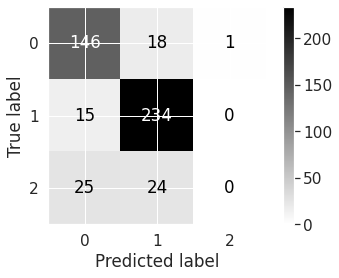

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

lr = LogisticRegression().fit(X_train, y_train)
y_pred = lr.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(lr.score(X_test, y_test))
plot_confusion_matrix(lr, X_test, y_test, cmap='gray_r')